# Synthesize a Table (Gaussian Coupla)

In [ ]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.5/201.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
real_data = pd.read_excel('/content/drive/MyDrive/Vezilka/SDV models/register-na-cvrst-otpad-2020-godina.xlsx')

In [ ]:
real_data.head()

,Институција,Контакт лице,Адреса,е-пошта,Unnamed: 4,Број на дозвола,Шифри,Видови на отпад,m³,t,kg
0,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,130205,Моторномасло,NaN,6.900,NaN
1,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,150202,Отпаднифилтриодмасло и гориво,NaN,NaN,60
2,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,1,Комуналенотпад,NaN,1.500,NaN
3,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,160601,Акумулатори,NaN,2.175,NaN
4,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,170405,Отпадножелезо,NaN,NaN,247


In [ ]:
real_data.drop(columns=["Unnamed: 4", "Број на дозвола", "Шифри"], inplace=True)

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

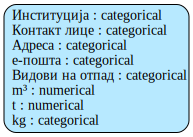

In [ ]:
metadata.visualize()

Creating a Synthesizer

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)

/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



 Generating Synthetic Data

In [ ]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,Институција,Контакт лице,Адреса,е-пошта,Видови на отпад,m³,t,kg
0,Трговско друштво за трговија со возила и резер...,Дејан Шошковски,ул. Булевар „8 ми Септември“ бр. 21 Скопје,soskovski.dejna@hotmail.com,масла и маслазаподмачкување,NaN,13.541,NaN
1,МИРКАТ ДООЕЛ - Скопје,Мирослав Марковски,"ул.Скупи 37, Скопје",ljube.neshovski@mirkat.com.mk,Пластика,NaN,NaN,NaN
2,МИРКАТ ДООЕЛ - Скопје,Дејан Шошковски,ул. Скупи бр.1,soskovski.dejna@hotmail.com,компононентиизведениодотфрленаопрема ),NaN,3.574,NaN
3,ЈЗУ ГОБ „8 миСептември“ Скопје,Гордана Илиќ,ул. Париска бб Скопје,gordana.ilic@bolnica.org.mk,Мешанкомуналенотпад,NaN,NaN,NaN
4,МИРКАТ ДООЕЛ - Скопје,Дејан Шошковски,ул. Булевар „8 ми Септември“ бр. 21 Скопје,soskovski.dejna@hotmail.com,Отпадоделектрична и електронскаопрема,NaN,8.013,NaN


Evaluating Real vs. Synthetic Data

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 8/8 [00:00<00:00, 698.18it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 163.98it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 8/8 [00:00<00:00, 691.36it/s]|
Column Shapes Score: 82.32%

(2/2) Evaluating Column Pair Trends: |██████████| 28/28 [00:00<00:00, 118.62it/s]|
Column Pair Trends Score: 57.26%

Overall Score (Average): 69.79%



In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,Институција,TVComplement,0.939628
1,Контакт лице,TVComplement,0.945823
2,Адреса,TVComplement,0.929395
3,е-пошта,TVComplement,0.962743
4,Видови на отпад,TVComplement,0.880884
5,m³,KSComplement,0.375000
6,t,KSComplement,0.590746
7,kg,TVComplement,0.961446


Visualizing the Data

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='Видови на отпад',
    metadata=metadata
)

fig.show()